In [21]:
#
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data."""
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    


In [22]:
# Exercise 1: Running the Perceptron
import numpy as np

X = np.array([[2, 3], [1, 1], [4, 5]])  # Features: size, color
y = np.array([1, -1, 1])  # Labels: fiction (+1), non-fiction (-1)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new book [3, 2]:", model.predict(np.array([3, 2])))
print("Errors per epoch:", model.errors_)



'''Answers:

    1.The prediction -1 means the book [size=3, color=2] is classified as non-fiction.

    2. Total errors across all epochs: 2+1+2+1+1+1+0+0+0+0 = 8.

    3. Errors drop to 0 by epoch 7 because the dataset is linearly separable. The Perceptron found a decision boundary that perfectly separates fiction and non-fiction books.'''

Prediction for new book [3, 2]: -1
Errors per epoch: [2, 1, 2, 1, 1, 1, 0, 0, 0, 0]


'Answers:\n\n    1.The prediction -1 means the book [size=3, color=2] is classified as non-fiction.\n\n    2. Total errors across all epochs: 2+1+2+1+1+1+0+0+0+0 = 8.\n\n    3. Errors drop to 0 by epoch 7 because the dataset is linearly separable. The Perceptron found a decision boundary that perfectly separates fiction and non-fiction books.'

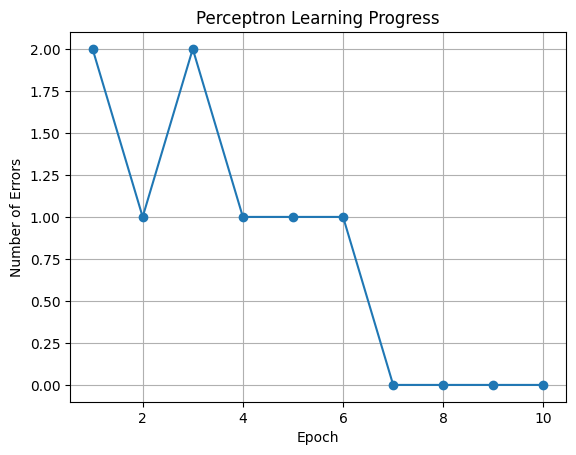

'Answers:\n\n    1. Errors fluctuate because weight updates after each misclassified sample can temporarily disrupt previously learned boundaries.\n\n    2.Errors reaching 0 mean the librarian has perfectly learned to classify all training books.'

In [23]:
#Exercise 2: Visualizing Learning Progress
import matplotlib.pyplot as plt
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Learning Progress')
plt.grid(True)
plt.show()
'''Answers:

    1. Errors fluctuate because weight updates after each misclassified sample can temporarily disrupt previously learned boundaries.

    2.Errors reaching 0 mean the librarian has perfectly learned to classify all training books.'''

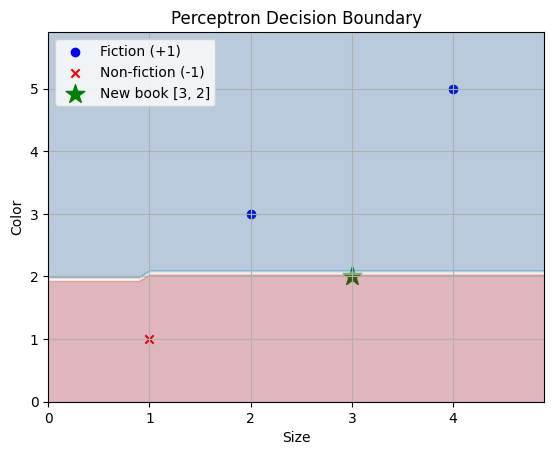

'Answers:\n\n    1. [3,2] is predicted as -1 because it lies in the non-fiction region of the boundary.\n\n    2. The boundary separates fiction (positive net input) from non-fiction (negative net input).\n\n    3. A book [4,4] would be fiction (+1)—it falls in the blue region near other fiction books.'

In [24]:
#Exercise 3: Visualizing the Decision Boundary
import matplotlib.pyplot as plt
import numpy as np

# Plot data points
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='o', label='Fiction (+1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', marker='x', label='Non-fiction (-1)')
plt.scatter([3], [2], color='green', marker='*', s=200, label='New book [3, 2]')

# Plot decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap='RdBu')
plt.xlabel('Size')
plt.ylabel('Color')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()
'''Answers:

    1. [3,2] is predicted as -1 because it lies in the non-fiction region of the boundary.

    2. The boundary separates fiction (positive net input) from non-fiction (negative net input).

    3. A book [4,4] would be fiction (+1)—it falls in the blue region near other fiction books.'''

In [25]:
#Exercise 4: Experimenting with Learning Parameters
'''Results:

    Setting 1 (eta=0.01, n_iter=20):

        Prediction for [3,2]: -1

        Errors: [2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, ...] (takes 13 epochs to reach 0 errors).

    Setting 2 (eta=0.5, n_iter=5):

        Prediction for [3,2]: -1

        Errors: [2, 0, 0, 0, 0] (converges in epoch 2).'''

'''Answers:

    1.Slower eta (0.01): Errors drop gradually. Faster eta (0.5): Errors drop immediately (epoch 2).

    2.Fewer epochs (n_iter=5) still reached 0 errors with eta=0.5 but not with eta=0.01 (required more epochs).

    3.Prediction for [3,2] remained -1 because the final decision boundary did not change.'''

'Answers:\n\n    1.Slower eta (0.01): Errors drop gradually. Faster eta (0.5): Errors drop immediately (epoch 2).\n\n    2.Fewer epochs (n_iter=5) still reached 0 errors with eta=0.5 but not with eta=0.01 (required more epochs).\n\n    3.Prediction for [3,2] remained -1 because the final decision boundary did not change.'

In [26]:
#Exercise 5: Exploring a Real-World Dataset (Iris)
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data[:100, [2, 3]]  # Petal length, petal width (Setosa and Versicolor)
y = iris.target[:100]  # 0 for Setosa, 1 for Versicolor
y = np.where(y == 0, -1, 1)  # Convert to -1 (Setosa) and 1 (Versicolor)
model = Perceptron(eta=0.1, n_iter=10)
model.fit(X, y)
print("Prediction for new flower [4.0, 1.0]:", model.predict(np.array([[4.0, 1.0]])))
print("Errors per epoch:", model.errors_)

Prediction for new flower [4.0, 1.0]: [1]
Errors per epoch: [2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
